In [133]:
import pandas as pd
import matplotlib as plm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as mcolors
import seaborn as sns
import numpy as np
from numpy import median

# Cleaning e manipolazione dataset

In [134]:
df = pd.read_csv('compitino_dataviz_2021_2022.csv')
df

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
...,...,...,...,...,...,...,...,...,...,...
2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True
2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True
2108,SF12 PhysicalScore,36.47,43.47,sereno,M,69,23.0,55.0,False,True


In [135]:
physical = df[df['nome_modulistica'] == 'SF12 PhysicalScore'].reset_index()
physical = physical.rename(columns = {'score_preop':'physical_score_preop', 'score_postop':'physical_score_postop'})
physical

,index,nome_modulistica,physical_score_preop,physical_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
2,4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
3,6,SF12 PhysicalScore,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True
4,8,SF12 PhysicalScore,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1050,2100,SF12 PhysicalScore,28.78,45.18,poco nuvoloso,F,57,23.0,61.0,True,True
1051,2102,SF12 PhysicalScore,27.63,39.33,sereno,F,58,21.0,71.0,True,True
1052,2104,SF12 PhysicalScore,29.01,49.81,nebbia al mattino,M,70,20.0,71.0,True,True
1053,2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True


In [136]:
mental = df[df['nome_modulistica'] == 'SF12 MentalScore'].reset_index()
mental = mental.rename(columns = {'score_preop':'mental_score_preop', 'score_postop':'mental_score_postop'})
mental

,index,nome_modulistica,mental_score_preop,mental_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
2,5,SF12 MentalScore,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
3,7,SF12 MentalScore,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
4,9,SF12 MentalScore,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1050,2101,SF12 MentalScore,37.40,34.50,poco nuvoloso,F,57,23.0,61.0,True,True
1051,2103,SF12 MentalScore,33.93,59.13,sereno,F,58,21.0,71.0,True,True
1052,2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
1053,2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True


In [137]:
df1 = pd.concat([physical, mental[['mental_score_preop', 'mental_score_postop']]], axis = 1)
df1

,index,nome_modulistica,physical_score_preop,physical_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,mental_score_preop,mental_score_postop
0,0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True,54.36,58.46
1,2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True,57.02,64.62
2,4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True,60.27,58.47
3,6,SF12 PhysicalScore,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True,50.17,54.97
4,8,SF12 PhysicalScore,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True,54.14,55.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2100,SF12 PhysicalScore,28.78,45.18,poco nuvoloso,F,57,23.0,61.0,True,True,37.40,34.50
1051,2102,SF12 PhysicalScore,27.63,39.33,sereno,F,58,21.0,71.0,True,True,33.93,59.13
1052,2104,SF12 PhysicalScore,29.01,49.81,nebbia al mattino,M,70,20.0,71.0,True,True,57.54,62.34
1053,2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True,48.84,50.94


In [138]:
df1.drop('index', axis = 1, inplace = True)
df1.drop('nome_modulistica', axis = 1, inplace = True)

In [139]:
columns_names = ['physical_score_preop',
 'physical_score_postop', 
 'mental_score_preop',
 'mental_score_postop',
 'condizioni_meteo',
 'sesso',
 'anni_ricovero',
 'temperatura_media',
 'umidita_media',
 'HI > 27',
 'natural_light']
df1 = df1.reindex(columns=columns_names)
df1.head()

,physical_score_preop,physical_score_postop,mental_score_preop,mental_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,28.15,38.25,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
2,31.57,55.67,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
3,34.28,57.08,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
4,27.43,29.13,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True


### Aggiunta differenze postop-preop

Genero due nuove colonne contenti le differenze tra gli score post e pre operazione

In [140]:
physical_score_diff = df1['physical_score_postop'] - df1['physical_score_preop']
mental_score_diff = df1['mental_score_postop'] - df1['mental_score_preop']
df1.insert(2,"physical_score_diff", physical_score_diff)
df1.insert(5,"mental_score_diff", mental_score_diff)

Converto le colonne delle variabili categoriche da stringhe a fattori:

In [141]:
df1['condizioni_meteo'] = df1['condizioni_meteo'].astype("category")
df1['sesso'] = df1['sesso'].astype("category")

### Aggiunta differenze physical-mental

In [142]:
physical_mental_diff_postop = df1['physical_score_postop'] - df1['mental_score_postop']
physical_mental_diff_preop = df1['physical_score_preop'] - df1['mental_score_preop']
df1.insert(6,"physical_mental_diff_postop", physical_mental_diff_postop)
df1.insert(7,"physical_mental_diff_preop", physical_mental_diff_preop)
mental_physical_diff_postop = df1['mental_score_postop'] - df1['physical_score_postop'] 
mental_physical_diff_preop = df1['mental_score_preop'] - df1['physical_score_preop']
df1.insert(8,"mental_physical_diff_postop", mental_physical_diff_postop)
df1.insert(9,"mental_physical_diff_preop", mental_physical_diff_preop)

In [143]:
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,mental_physical_diff_postop,mental_physical_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,21.06,26.76,poco nuvoloso,F,70,20.0,69.0,False,True
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,26.37,28.87,poco nuvoloso,M,69,18.0,65.0,False,True
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,2.80,28.70,poco nuvoloso,M,70,23.0,74.0,False,True
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,-2.11,15.89,poco nuvoloso,F,66,15.0,72.0,False,True
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,26.61,26.71,nebbia al mattino,F,73,18.0,75.0,False,True


### Splitting del dataset

In [144]:
mental_score_dataset = df[df['nome_modulistica'] == 'SF12 MentalScore']
physical_score_dataset = df[df['nome_modulistica'] == 'SF12 PhysicalScore']

Controllo che il tipo di modulo utilizzato sia sempre SF12 per ogni record

In [145]:
mental_score_dataset['nome_modulistica'].nunique() == physical_score_dataset['nome_modulistica'].nunique() == 1

True

Droppo la colonna nome_modulistica

In [146]:
mental_score_dataset.drop('nome_modulistica', axis = 1, inplace = True)
physical_score_dataset.drop('nome_modulistica',  axis = 1, inplace = True)

C:\Users\Giorgio\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Aggiungo la colonna delle differenze 

In [147]:
physical_score_dataset.insert(2,"score_diff", (physical_score_dataset['score_postop'] - physical_score_dataset['score_preop']).round(3))
mental_score_dataset.insert(2,"score_diff", (mental_score_dataset['score_postop'] - mental_score_dataset['score_preop']).round(3))

In [148]:
physical_score_dataset.head()

,score_preop,score_postop,score_diff,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,9.8,poco nuvoloso,F,70,20.0,69.0,False,True
2,28.15,38.25,10.1,poco nuvoloso,M,69,18.0,65.0,False,True
4,31.57,55.67,24.1,poco nuvoloso,M,70,23.0,74.0,False,True
6,34.28,57.08,22.8,poco nuvoloso,F,66,15.0,72.0,False,True
8,27.43,29.13,1.7,nebbia al mattino,F,73,18.0,75.0,False,True


### Salvataggio datasets

In [149]:
df1.to_csv('dataset_normalizzato_con_differenze.csv', index = False)
mental_score_dataset.to_csv('mental_score_SF12.csv', index = False)
physical_score_dataset.to_csv('physical_score_SF12.csv', index = False)

# Visualizzazioni

Valuto le correlazioni con un pairplot

In [150]:
#sns.pairplot(df1)

Valuto alcuni violin plot condizionati

<AxesSubplot:xlabel='sesso', ylabel='physical_score_postop'>

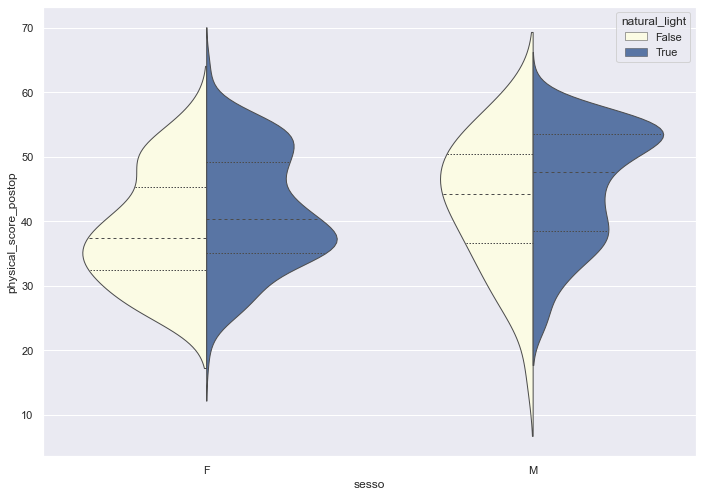

In [151]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df1, x="sesso", y="physical_score_postop", hue="natural_light",
               split=True, inner="quart", linewidth=1, palette = {False:'lightyellow', True:'b'})

<AxesSubplot:xlabel='natural_light', ylabel='physical_score_postop'>

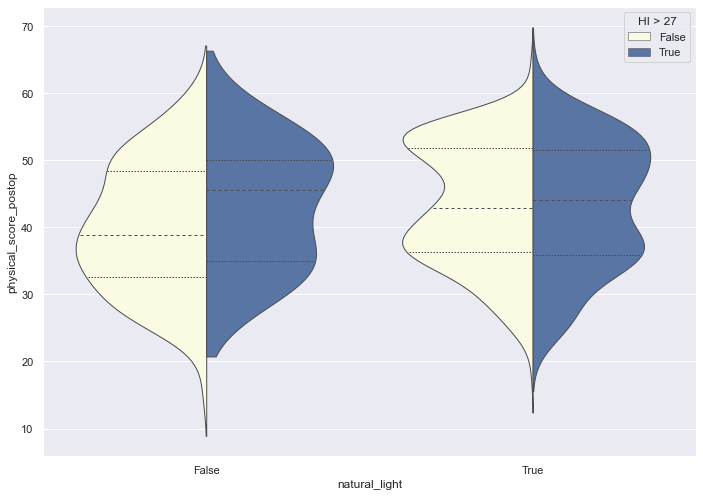

In [152]:
sns.violinplot(data=df1, x="natural_light", y="physical_score_postop", hue="HI > 27",
               split=True, inner="quart", linewidth=1, palette = {False:'lightyellow', True:'b'})

<AxesSubplot:xlabel='natural_light', ylabel='physical_score_postop'>

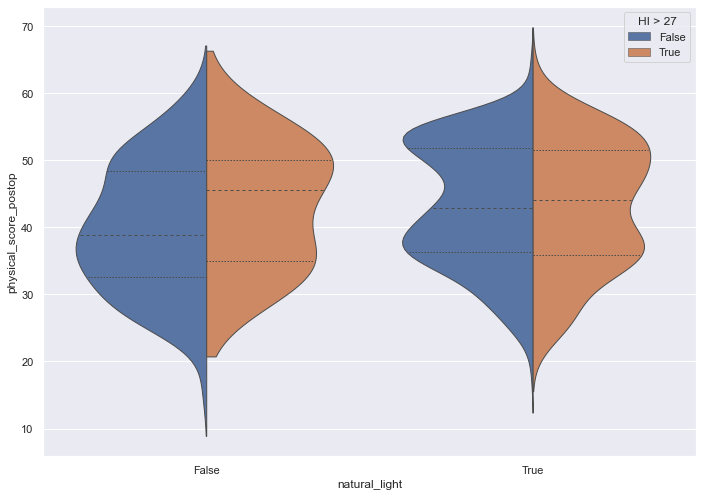

In [153]:
sns.violinplot(data=df1, x="natural_light", y="physical_score_postop", hue="HI > 27",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='HI > 27', ylabel='score_postop'>

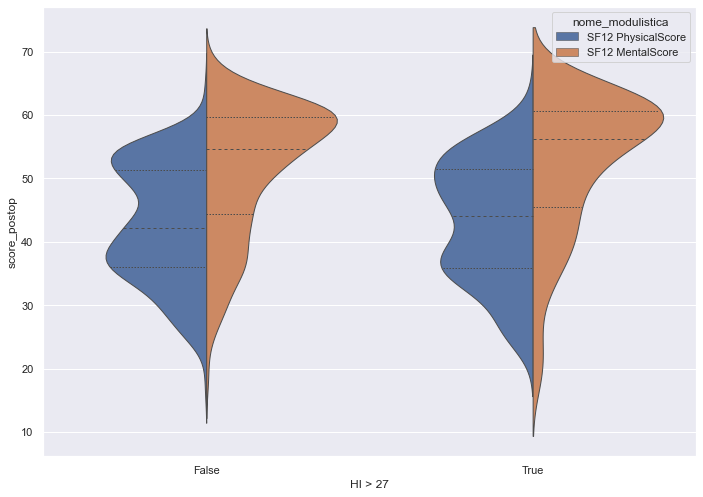

In [154]:
sns.violinplot(data=df, x="HI > 27", y="score_postop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='HI > 27', ylabel='score_preop'>

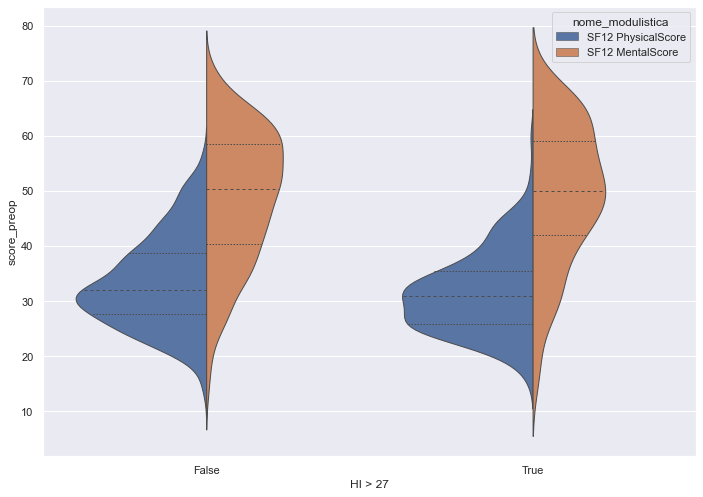

In [155]:
sns.violinplot(data=df, x="HI > 27", y="score_preop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='nome_modulistica', ylabel='score_preop'>

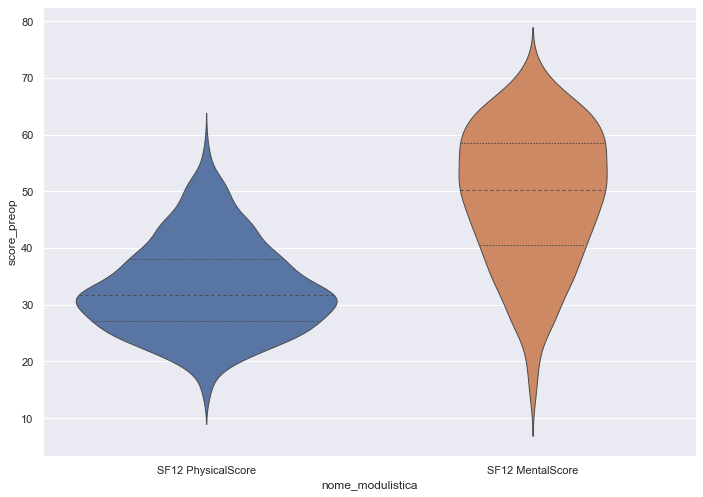

In [156]:
sns.violinplot(data=df, x="nome_modulistica", y="score_preop",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='nome_modulistica', ylabel='score_postop'>

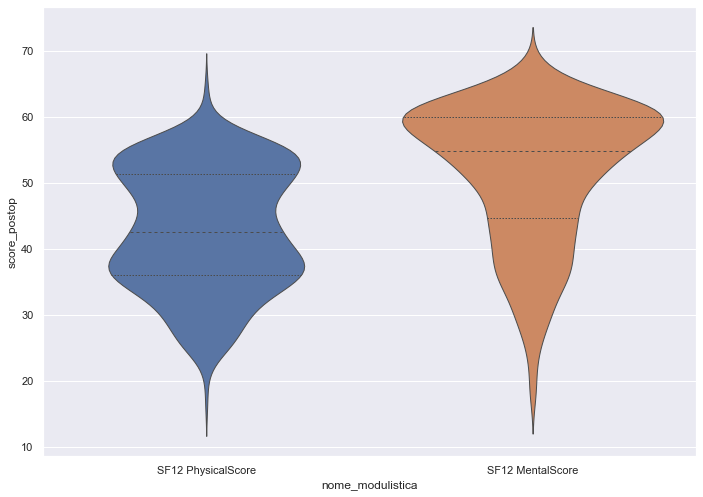

In [157]:
sns.violinplot(data=df, x="nome_modulistica", y="score_postop",
               split=True, inner="quart", linewidth=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'poco nuvoloso'),
  Text(1, 0, 'nebbia al mattino'),
  Text(2, 0, 'sereno'),
  Text(3, 0, 'pioggia e schiarite'),
  Text(4, 0, 'pioggia debole'),
  Text(5, 0, 'nubi sparse'),
  Text(6, 0, 'temporale e schiarite'),
  Text(7, 0, 'neve'),
  Text(8, 0, 'coperto'),
  Text(9, 0, 'neve e schiarite'),
  Text(10, 0, 'neve debole'),
  Text(11, 0, 'sole e caldo'),
  Text(12, 0, 'pioggia mista a neve e schiarite'),
  Text(13, 0, 'nebbia'),
  Text(14, 0, 'pioggia')])

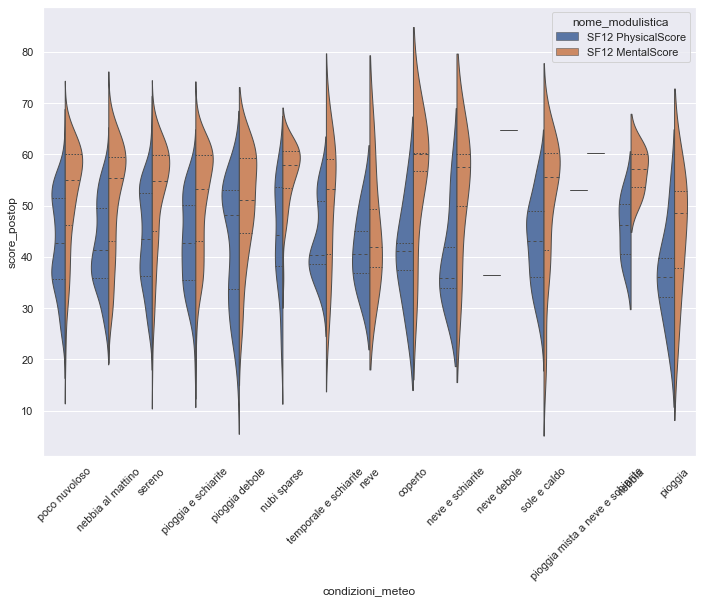

In [158]:
sns.violinplot(data=df, x="condizioni_meteo", y="score_postop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)
plt.xticks(rotation=45)

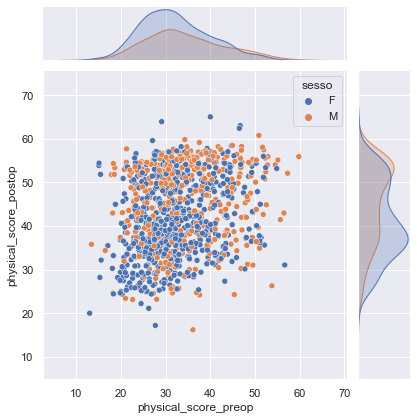

In [159]:
#physical pre/post op evidenziando il genere
#notiamo bimodalità nell genere femminile per quanto riguarda lo score post operatorio
sns.jointplot(data=df1, x="physical_score_preop", y="physical_score_postop", hue="sesso", )

In [160]:
#physical pre/post op evidenziando il genere
#notiamo bimodalità nell genere femminile per quanto riguarda lo score post operatorio
#sns.jointplot(data=df1b, x="physical_score_diff", y="mental_score_diff", hue="HI > 27")

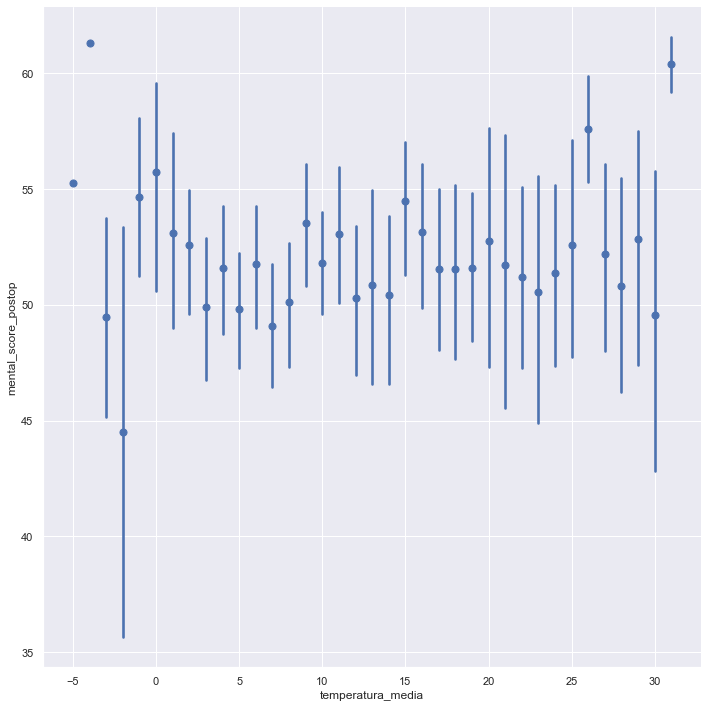

In [161]:

sns.lmplot(y = 'mental_score_postop', x = 'temperatura_media', data=df1, fit_reg=False, height=10, x_estimator=np.mean, truncate=True)

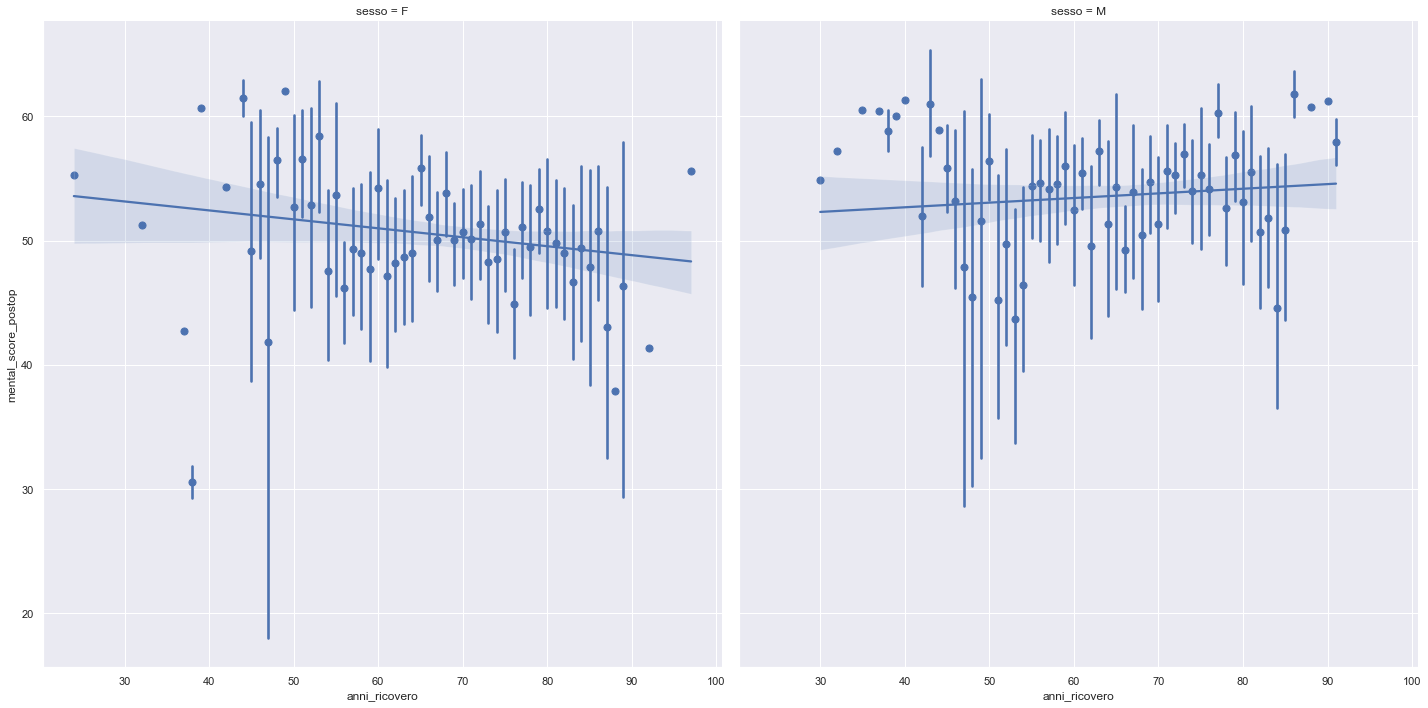

In [162]:
sns.lmplot(y = 'mental_score_postop', x = 'anni_ricovero', col = 'sesso', data=df1, fit_reg=True, height=10, x_estimator=np.mean, truncate=True)

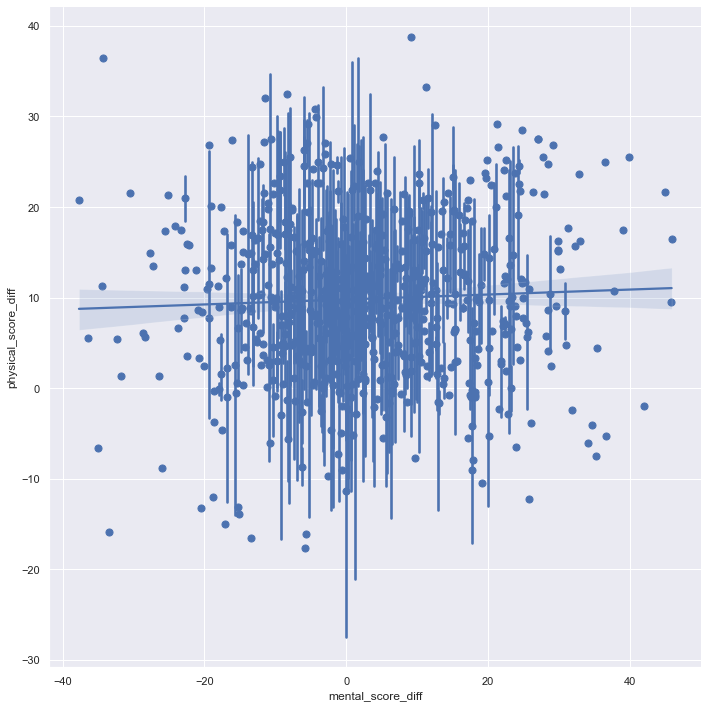

In [163]:
sns.lmplot(y = 'physical_score_diff', x = 'mental_score_diff', data=df1, fit_reg=True, height=10, x_estimator=np.mean, truncate=True)

Differenza media preop_postop di mental score (con sd), in funzione del sesso e della presenza o meno di natural_light 

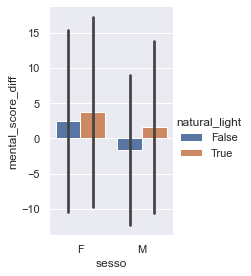

In [164]:
sns.catplot(x="sesso", y="mental_score_diff",
            hue="natural_light",
            data=df1, kind="bar", ci = 'sd',
            height=4, aspect=.7);

In [165]:
df1[(df1['HI > 27'] == True) & (df1['sesso'] == 'F') & (df1['natural_light'] == False)]['mental_score_diff'].mean()

1.7750000000000004

<AxesSubplot:xlabel='mental_score_postop', ylabel='physical_score_postop'>

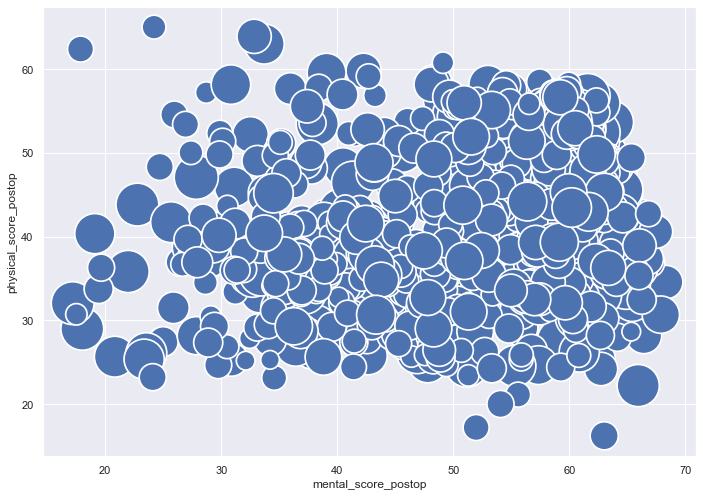

In [166]:
sns.scatterplot(data=df1, x="mental_score_postop", y="physical_score_postop", size="temperatura_media", legend=False, sizes=(20, 2000))


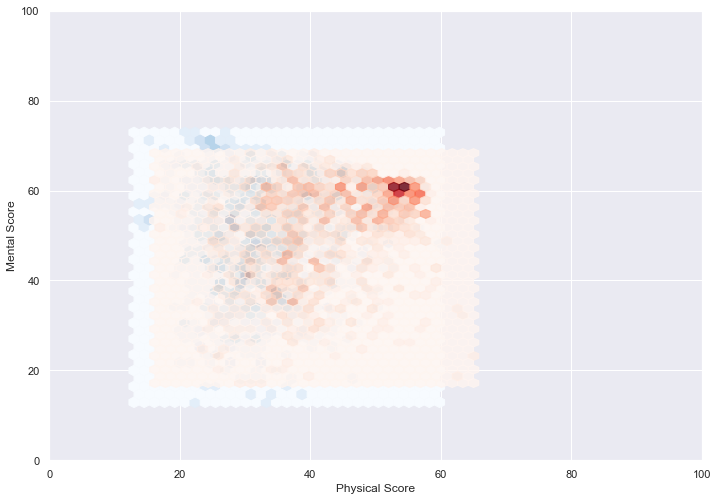

In [167]:
#plt.style.use('classic')
fig = plt.figure()
ax = plt.axes()
plt.xlim(0,100)
plt.ylim(0,100)
plt.hexbin(data=df1, x="physical_score_preop", y="mental_score_preop", gridsize=30, cmap="Blues", alpha=1)
plt.xlabel('Physical Score')
plt.ylabel('Mental Score')
plt.hexbin(data=df1, x="physical_score_postop", y="mental_score_postop", gridsize=30, cmap="Reds", alpha=0.8);

# Tentativi vari

Togliamo le osservazioni sotto i 30 e sopra i 90 anni, data la scarsa numerosità.

In [168]:
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['anni_ricovero']<30].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['anni_ricovero']>90].index, inplace=True)

C:\Users\Giorgio\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [169]:
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['anni_ricovero']<30].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['anni_ricovero']>90].index, inplace=True)

Divido per fasce d'età:

In [170]:
physical_score_dataset.insert(6, 'Age_group', pd.cut(physical_score_dataset['anni_ricovero'], bins = [30, 40, 50, 60, 70, 80, 90], \
              right = False, labels = ['[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90]']))

In [171]:
mental_score_dataset.insert(6, 'Age_group', pd.cut(mental_score_dataset['anni_ricovero'], bins = [30, 40, 50, 60, 70, 80, 90], \
              right = False, labels = ['[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90]']))

Droppo le condizioni meteo con numerosità inferiore a 30:

In [172]:
physical_score_dataset.groupby('condizioni_meteo').size()

condizioni_meteo
coperto                               5
nebbia                                7
nebbia al mattino                   150
neve                                  4
neve debole                           1
neve e schiarite                      4
nubi sparse                          35
pioggia                               7
pioggia debole                       46
pioggia e schiarite                 173
pioggia mista a neve e schiarite      1
poco nuvoloso                       334
sereno                              216
sole e caldo                         49
temporale e schiarite                18
dtype: int64

In [173]:
mental_score_dataset.groupby('condizioni_meteo').size()

condizioni_meteo
coperto                               5
nebbia                                7
nebbia al mattino                   150
neve                                  4
neve debole                           1
neve e schiarite                      4
nubi sparse                          35
pioggia                               7
pioggia debole                       46
pioggia e schiarite                 173
pioggia mista a neve e schiarite      1
poco nuvoloso                       334
sereno                              216
sole e caldo                         49
temporale e schiarite                18
dtype: int64

In [174]:
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='coperto'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='nebbia'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='neve'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='neve debole'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='neve e schiarite'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='pioggia'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='pioggia mista a neve e schiarite'].index, inplace=True)
physical_score_dataset.drop(physical_score_dataset.loc[physical_score_dataset['condizioni_meteo']=='temporale e schiarite'].index, inplace=True)

In [175]:
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='coperto'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='nebbia'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='neve'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='neve debole'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='neve e schiarite'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='pioggia'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='pioggia mista a neve e schiarite'].index, inplace=True)
mental_score_dataset.drop(mental_score_dataset.loc[mental_score_dataset['condizioni_meteo']=='temporale e schiarite'].index, inplace=True)

In [176]:
#temp3 = physical_score_dataset[['score_postop', 'condizioni_meteo']] #, 'HI > 27', 'temperatura_media', 'umidita_media']]
temp3 = physical_score_dataset[['score_postop', 'condizioni_meteo', 'HI > 27', 'temperatura_media', 'umidita_media']]
temp3.head()

,score_postop,condizioni_meteo,HI > 27,temperatura_media,umidita_media
0,37.40,poco nuvoloso,False,20.0,69.0
2,38.25,poco nuvoloso,False,18.0,65.0
4,55.67,poco nuvoloso,False,23.0,74.0
6,57.08,poco nuvoloso,False,15.0,72.0
8,29.13,nebbia al mattino,False,18.0,75.0


In [177]:
temp4 = mental_score_dataset[['score_postop', 'condizioni_meteo', 'HI > 27', 'temperatura_media', 'umidita_media']]
temp4.head()

,score_postop,condizioni_meteo,HI > 27,temperatura_media,umidita_media
1,58.46,poco nuvoloso,False,20.0,69.0
3,64.62,poco nuvoloso,False,18.0,65.0
5,58.47,poco nuvoloso,False,23.0,74.0
7,54.97,poco nuvoloso,False,15.0,72.0
9,55.74,nebbia al mattino,False,18.0,75.0


In [178]:
temp3.groupby(['condizioni_meteo']).mean()

,score_postop,HI > 27,temperatura_media,umidita_media
condizioni_meteo,,,,
nebbia al mattino,42.214667,0.020000,6.753333,81.953333
nubi sparse,44.449143,0.028571,10.457143,77.828571
pioggia debole,42.719348,0.000000,7.500000,93.369565
pioggia e schiarite,42.705780,0.000000,10.092486,85.514451
poco nuvoloso,42.830808,0.326347,16.000000,66.446108
sereno,43.632685,0.087963,11.291667,59.106481
sole e caldo,42.714286,1.000000,27.122449,58.469388


In [179]:
temp4.groupby(['condizioni_meteo']).mean()

,score_postop,HI > 27,temperatura_media,umidita_media
condizioni_meteo,,,,
nebbia al mattino,51.498400,0.020000,6.753333,81.953333
nubi sparse,56.215143,0.028571,10.457143,77.828571
pioggia debole,49.976957,0.000000,7.500000,93.369565
pioggia e schiarite,50.777630,0.000000,10.092486,85.514451
poco nuvoloso,51.944491,0.326347,16.000000,66.446108
sereno,51.922824,0.087963,11.291667,59.106481
sole e caldo,50.254286,1.000000,27.122449,58.469388


Joyplot:

(<Figure size 842.4x595.44 with 8 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:title={'center':'Prova'}>])

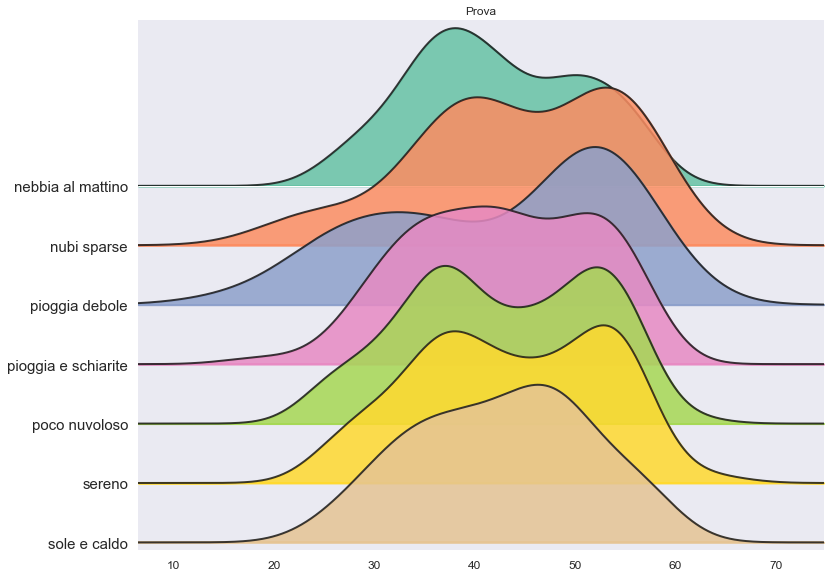

In [180]:
!pip install joypy
import joypy

joypy.joyplot(temp3[['score_postop', 'condizioni_meteo']], by='condizioni_meteo', ylim='own', figsize=(11.7, 8.27),
                          title=f"Prova",  
                          ylabelsize=15, tails=0.2, linewidth=2, overlap=2, alpha=0.85, 
                          grid='y', xlim=[0, 100], colormap=plm.cm.Set2)

(<Figure size 842.4x595.44 with 8 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:title={'center':'Prova'}>])

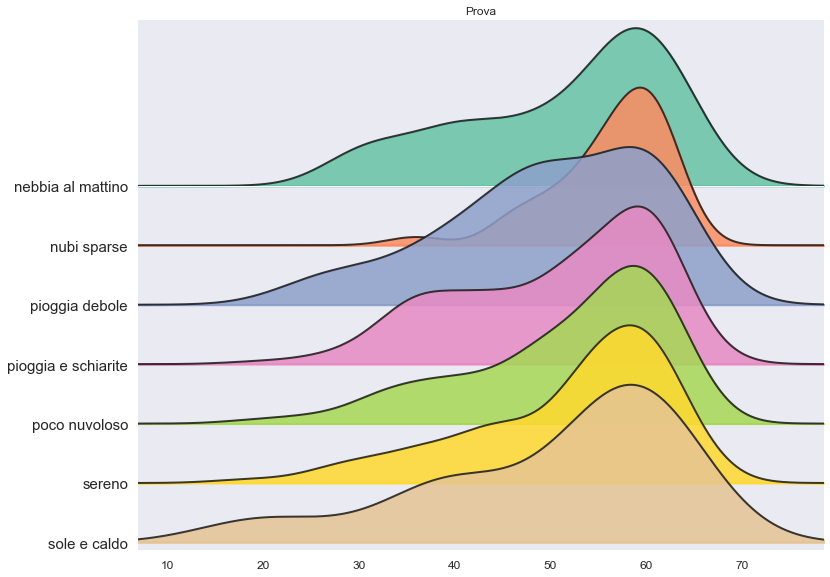

In [181]:
#!pip install joypy
#import joypy

joypy.joyplot(temp4[['score_postop', 'condizioni_meteo']], by='condizioni_meteo', ylim='own', figsize=(11.7, 8.27),
                          title=f"Prova",  
                          ylabelsize=15, tails=0.2, linewidth=2, overlap=2, alpha=0.85, 
                          grid='y', xlim=[0, 100], colormap=plm.cm.Set2)

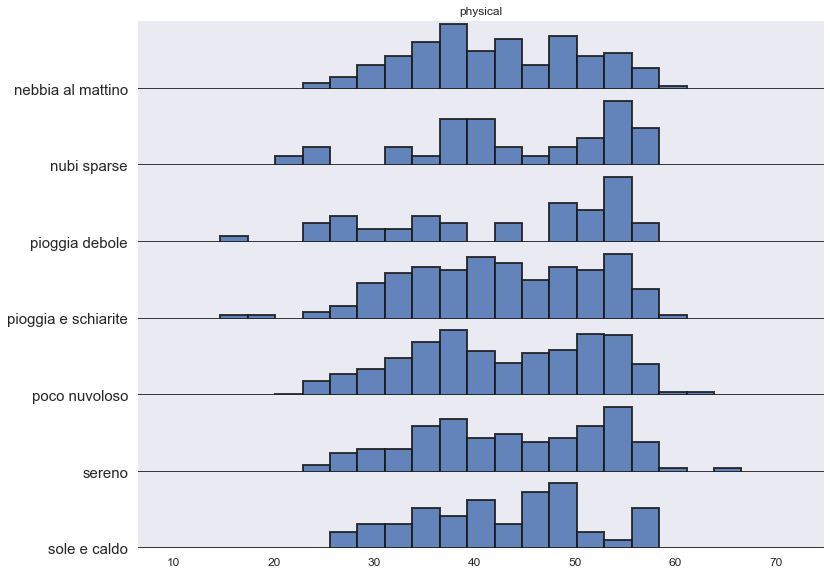

In [182]:
#!pip install joypy
#import joypy
fig, axes = joypy.joyplot(temp3[['score_postop', 'condizioni_meteo']], by='condizioni_meteo', ylim='own', figsize=(11.7, 8.27),
                          title=f"physical",  
                          ylabelsize=15, tails=0.2, linewidth=2, overlap=0, alpha=0.85, hist = True, bins = 25,
                          grid='y', xlim=[0, 100], colormap=plm.cm.Set2)

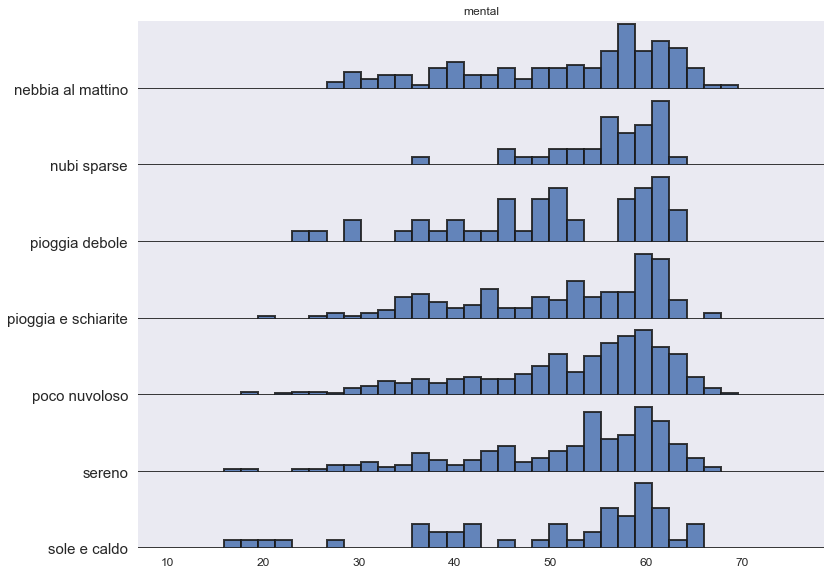

In [183]:
#!pip install joypy
#import joypy
fig, axes = joypy.joyplot(temp4[['score_postop', 'condizioni_meteo']], by='condizioni_meteo', ylim='own', figsize=(11.7, 8.27),
                          title=f"mental",  
                          ylabelsize=15, tails=0.2, linewidth=2, overlap=0, alpha=0.85, hist = True, bins = 40,
                          grid='y', xlim=[0, 100], colormap=plm.cm.Set2)

Tutto il procedimento per l'heatmap:

In [184]:
temp = physical_score_dataset.groupby(['condizioni_meteo', 'Age_group'], as_index=False)['score_postop'].mean()

In [185]:
temp = temp.pivot(index='condizioni_meteo', columns='Age_group', values='score_postop')
temp

Age_group,[30-40),[40-50),[50-60),[60-70),[70-80),[80-90]
condizioni_meteo,,,,,,
nebbia al mattino,32.400000,40.656000,43.463043,43.765745,41.827963,38.764737
nubi sparse,NaN,40.265000,43.808000,48.836667,41.171538,44.960000
pioggia debole,54.580000,34.820000,32.832500,47.216154,44.088696,27.230000
pioggia e schiarite,44.965000,41.035000,41.682308,43.293571,43.131481,41.657407
poco nuvoloso,42.903333,44.247778,42.883208,43.080816,42.559238,42.373333
sereno,NaN,46.584444,45.420000,43.293333,44.012530,39.083478
sole e caldo,NaN,31.430000,43.234286,42.163333,44.120000,43.126250


<AxesSubplot:xlabel='Age_group', ylabel='condizioni_meteo'>

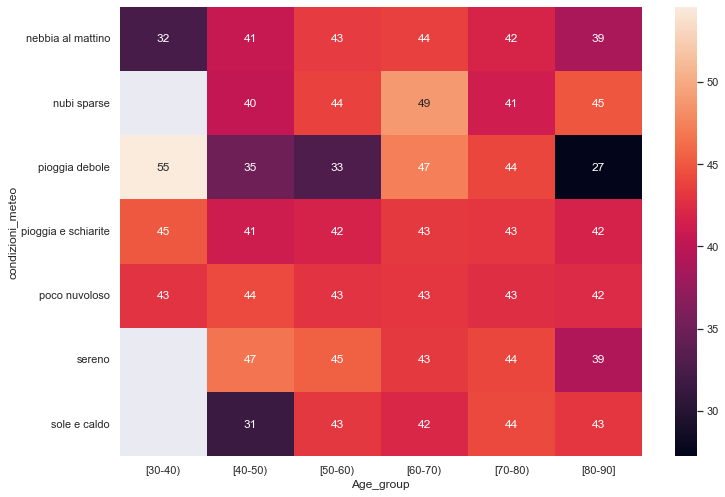

In [186]:
sns.heatmap(temp, annot=True)

 ## Altri tentativi

### Parallel coordinates

In [187]:
means = physical_score_dataset.groupby('condizioni_meteo', as_index=False)['score_preop', 'score_postop'].mean()
means.head()

C:\Users\Giorgio\AppData\Local\Temp/ipykernel_23960/4084499539.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = physical_score_dataset.groupby('condizioni_meteo', as_index=False)['score_preop', 'score_postop'].mean()


,condizioni_meteo,score_preop,score_postop
0,nebbia al mattino,32.956000,42.214667
1,nubi sparse,34.612000,44.449143
2,pioggia debole,34.619348,42.719348
3,pioggia e schiarite,33.316763,42.705780
4,poco nuvoloso,32.518533,42.830808


<AxesSubplot:>

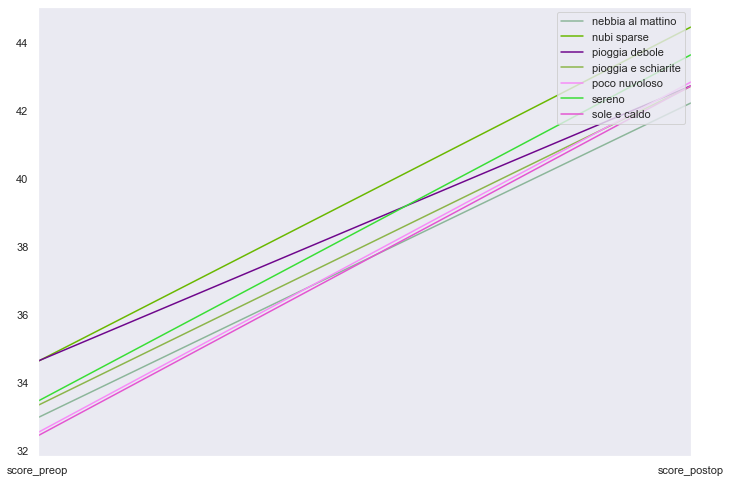

In [188]:
pd.plotting.parallel_coordinates(means, 'condizioni_meteo')

In [189]:
mental_means = mental_score_dataset.groupby('condizioni_meteo', as_index=False)['score_preop', 'score_postop'].mean()
mental_means.head()

C:\Users\Giorgio\AppData\Local\Temp/ipykernel_23960/1554224973.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mental_means = mental_score_dataset.groupby('condizioni_meteo', as_index=False)['score_preop', 'score_postop'].mean()


,condizioni_meteo,score_preop,score_postop
0,nebbia al mattino,48.785067,51.498400
1,nubi sparse,50.683714,56.215143
2,pioggia debole,48.070435,49.976957
3,pioggia e schiarite,47.671272,50.777630
4,poco nuvoloso,49.366347,51.944491


<AxesSubplot:>

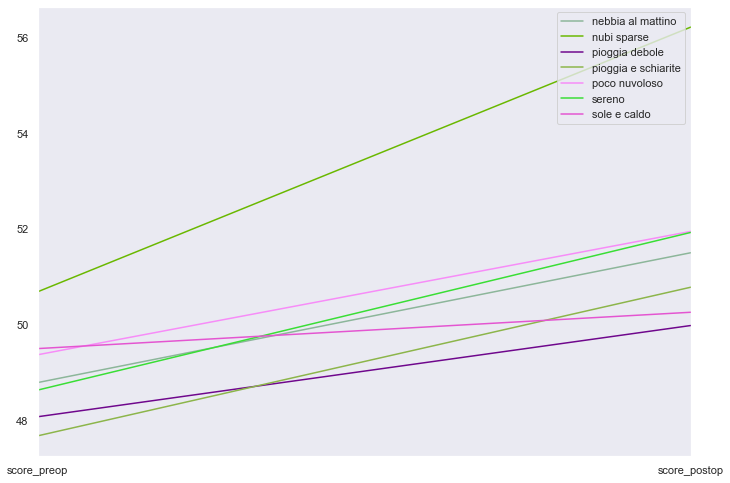

In [190]:
pd.plotting.parallel_coordinates(mental_means, 'condizioni_meteo')

Potrebbe avere senso mostrare questo? Ovviamente andrebbe sistemata la scala colore, si potrebbe pensare di mettere una banda per ciascuna riga che mostri la deviazione standard e magari anche, se è possibile, modificare lo spessore delle righe a seconda della numerosità dei gruppi.

# Tentativo percentuali

## Natural light

In [191]:
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,mental_physical_diff_postop,mental_physical_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,21.06,26.76,poco nuvoloso,F,70,20.0,69.0,False,True
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,26.37,28.87,poco nuvoloso,M,69,18.0,65.0,False,True
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,2.80,28.70,poco nuvoloso,M,70,23.0,74.0,False,True
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,-2.11,15.89,poco nuvoloso,F,66,15.0,72.0,False,True
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,26.61,26.71,nebbia al mattino,F,73,18.0,75.0,False,True


In [192]:
df1.groupby('natural_light').size()

natural_light
False    121
True     934
dtype: int64

In [193]:
df1['physical_score_postop'].mean()

42.862360189573465

In [194]:
df1['mental_score_postop'].mean()

51.63102369668237

In [195]:
def f_above_physical(row):
    if row['physical_score_postop'] >= 42.86:
        return 1
    elif row['physical_score_postop'] < 42.86:
        return 0
    
def f_above_mental(row):
    if row['mental_score_postop'] >= 51.63:
        return 1
    elif row['mental_score_postop'] < 51.63:
        return 0

In [196]:
df1['above_physical'] = df1.apply(f_above_physical, axis = 1)
df1['above_mental'] = df1.apply(f_above_mental, axis = 1)
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,mental_physical_diff_postop,mental_physical_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,above_physical,above_mental
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,21.06,26.76,poco nuvoloso,F,70,20.0,69.0,False,True,0,1
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,26.37,28.87,poco nuvoloso,M,69,18.0,65.0,False,True,0,1
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,2.80,28.70,poco nuvoloso,M,70,23.0,74.0,False,True,1,1
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,-2.11,15.89,poco nuvoloso,F,66,15.0,72.0,False,True,1,1
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,26.61,26.71,nebbia al mattino,F,73,18.0,75.0,False,True,0,1


In [197]:
df1.groupby(['natural_light', 'above_physical', 'above_mental']).size()

natural_light  above_physical  above_mental
False          0               0                42
                               1                32
               1               0                15
                               1                32
True           0               0               261
                               1               200
               1               0               104
                               1               369
dtype: int64

Proporzioni:

Natural_light = False:

quadrante in basso a sinistra (0,0) = 42/121 = 0,347

quadrante in alto a sinistra (0,1) = 32/121 = 0,264

quadrante in basso a destra (1,0) = 15/121 = 0,124

quadrante in alto a destra (1,1) = 32/121 = 0,264

Natural_light = True:

quadrante in basso a sinistra (0,0) = 261/924 = 0,282

quadrante in alto a sinistra (0,1) = 200/924 = 0,216

quadrante in basso a destra (1,0) = 104/924 = 0,113

quadrante in alto a destra (1,1) = 369/924 = 0,399

Per natural_light = True c'è una maggior percentuale di osservazioni in alto a destra (score sia fisico che mentale sopra la media). La luce spinge a dare dei voti più alti?

## HI > 27

In [198]:
df1.groupby('HI > 27').size()

HI > 27
False    864
True     191
dtype: int64

In [199]:
df1.groupby(['HI > 27', 'above_physical', 'above_mental']).size()

HI > 27  above_physical  above_mental
False    0               0               252
                         1               193
         1               0                98
                         1               321
True     0               0                51
                         1                39
         1               0                21
                         1                80
dtype: int64

Proporzioni:

HI > 27 = False:

quadrante in basso a sinistra (0,0) = 252/864 = 0,292

quadrante in alto a sinistra (0,1) = 193/864 = 0,223

quadrante in basso a destra (1,0) = 98/864 = 0,113

quadrante in alto a destra (1,1) = 321/864 = 0,371

HI < 27 = True:

quadrante in basso a sinistra (0,0) = 51/191 = 0,267

quadrante in alto a sinistra (0,1) = 39/191 = 0,204

quadrante in basso a destra (1,0) = 21/191 = 0,110

quadrante in alto a destra (1,1) = 80/191 = 0,419

Qua non mi sembra ci sia una grande differenza invece.

## Aggiunta colonna physical_mental_diff


# Ennesimo tentativo

In [200]:
def weather_cond(row):
    if row['condizioni_meteo'] in ['sereno', 'sole e caldo']:
        return 'bel tempo'
    if row['condizioni_meteo'] in ['poco nuvoloso', 'nubi sparse', 'coperto']:
        return 'nuvoloso'
    if row['condizioni_meteo'] in ['neve', 'neve debole']:
        return 'neve'
    if row['condizioni_meteo'] in ['pioggia e schiarite', 'temporale e schiarite', 'neve e schiarite',
                                    'pioggia mista a neve e schiarite']:
        return 'precipitazioni e schiarite'
    if row['condizioni_meteo'] in ['nebbia al mattino', 'nebbia']:
        return 'nebbia'
    if row['condizioni_meteo'] in ['pioggia', 'pioggia debole']:
        return 'pioggia'

In [201]:
df1['weather_category'] = df1.apply(weather_cond, axis = 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'sole e caldo'),
  Text(1, 0, 'sereno'),
  Text(2, 0, 'poco nuvoloso'),
  Text(3, 0, 'nubi sparse'),
  Text(4, 0, 'coperto'),
  Text(5, 0, 'nebbia al mattino'),
  Text(6, 0, 'nebbia'),
  Text(7, 0, 'pioggia e schiarite'),
  Text(8, 0, 'temporale e schiarite'),
  Text(9, 0, 'pioggia mista a neve e schiarite'),
  Text(10, 0, 'neve e schiarite'),
  Text(11, 0, 'pioggia debole'),
  Text(12, 0, 'pioggia'),
  Text(13, 0, 'neve debole'),
  Text(14, 0, 'neve')])

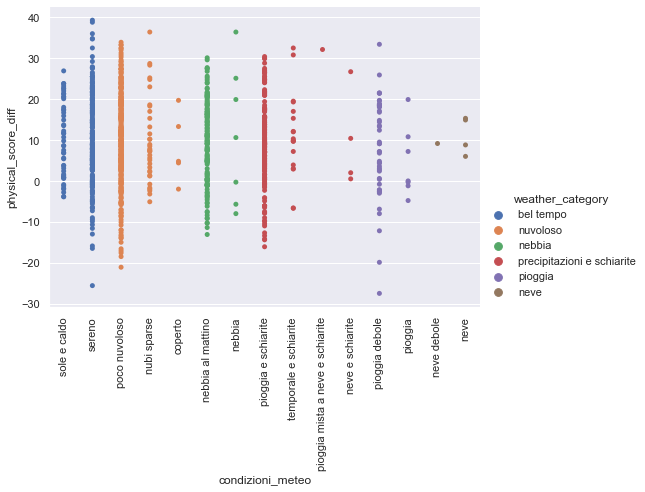

In [202]:
sns.catplot(x = 'condizioni_meteo', y = 'physical_score_diff', hue = 'weather_category', data = df1,
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = False, aspect = 11.7/8.27)
plt.xticks(rotation=90)

La neve ha solo score positivi! Sono pochissime osservazioni, ma c'è possibilità di dare del context per quelle osservazioni. Bene o male la maggior parte delle osservazioni portano a un miglioramento dello score: ovviamente in parte questo è dovuto alla buona riuscita dell'intervento però a quel punto potremmo concentrarci sui punti "estremi". La maggior parte dei punti con differenza maggiore di +30 è in corrispondenza di tempo sereno o poco nuvoloso, vorrà pur dire qualcosa no? Mentre fra i punti estremi in negativo abbiamo due punti in pioggia debole. Onestamente questa, tra tutte, è la visualizzazione in cui riesco a leggerci qualcosa (non molto, ma rispetto alle altre...). Si può sicuramente migliorare, soprattutto a livello di impatto visivo. 

Proviamo con uno `stripplot`

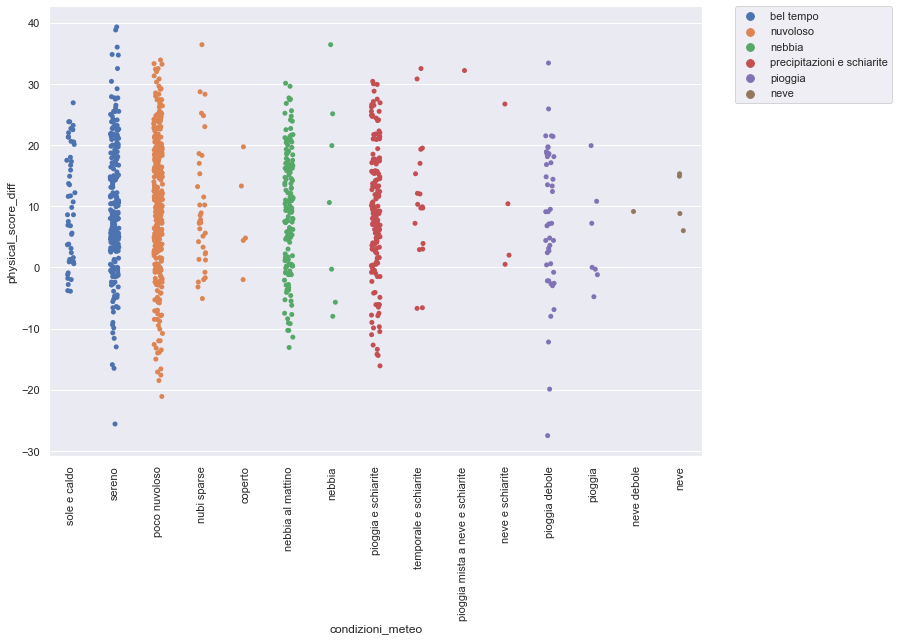

In [203]:
physical_diff = sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_diff', hue = 'weather_category', data = df1,
                       order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = True)
physical_diff.set_xticklabels(physical_diff.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Penso possa migliorare la visualizzazione una riduzione delle classi alle sole `weather_category` e la sovrapposizione dello `stripplot` ad un boxplot

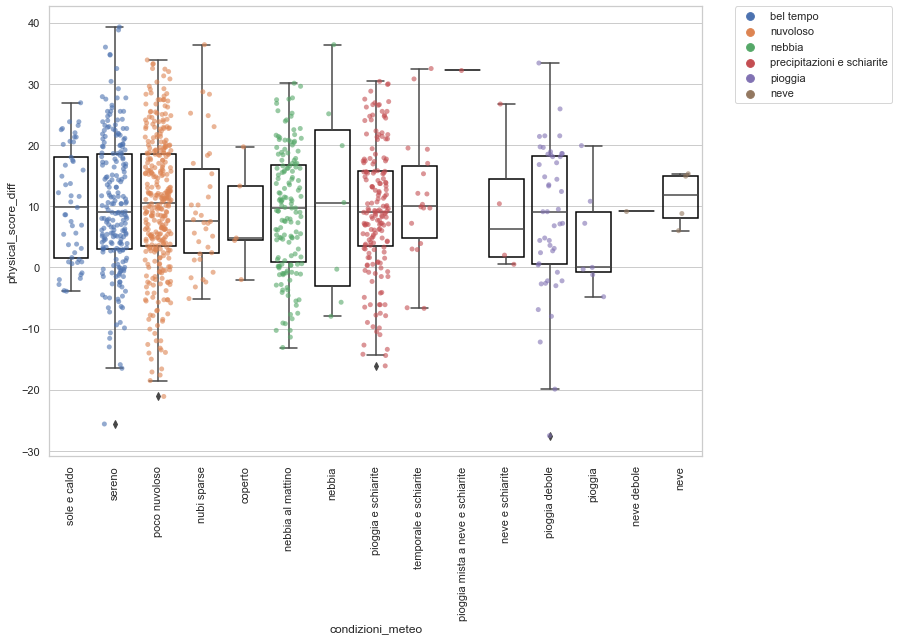

In [204]:
sns.set_style("whitegrid")
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
}
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_diff', data = df1, \
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
           'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', \
           'pioggia debole', 'pioggia', 'neve debole', 'neve'], **PROPS)
physical_diff = sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_diff', hue = 'weather_category', data = df1,
                       order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = 0.3, alpha = 0.6)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Provo a ridurre il numero di categorie tenendo solo quelle con numerosià maggiore di 30

In [205]:
condizioni_meteo_numerosità_sufficiente = ['nebbia al mattino', 'nubi sparse', 'pioggia debole', 'pioggia e schiarite', \
                                          'poco nuvoloso', 'sereno', 'sole e caldo']
df1_significativo = df1[df1['condizioni_meteo'].isin(condizioni_meteo_numerosità_sufficiente)]
df1_significativo["condizioni_meteo"] = df1_significativo["condizioni_meteo"].cat.remove_unused_categories()

C:\Users\Giorgio\AppData\Local\Temp/ipykernel_23960/1025064578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_significativo["condizioni_meteo"] = df1_significativo["condizioni_meteo"].cat.remove_unused_categories()


In [206]:
df1_significativo.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,mental_physical_diff_postop,mental_physical_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,above_physical,above_mental,weather_category
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,21.06,26.76,poco nuvoloso,F,70,20.0,69.0,False,True,0,1,nuvoloso
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,26.37,28.87,poco nuvoloso,M,69,18.0,65.0,False,True,0,1,nuvoloso
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,2.80,28.70,poco nuvoloso,M,70,23.0,74.0,False,True,1,1,nuvoloso
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,-2.11,15.89,poco nuvoloso,F,66,15.0,72.0,False,True,1,1,nuvoloso
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,26.61,26.71,nebbia al mattino,F,73,18.0,75.0,False,True,0,1,nebbia


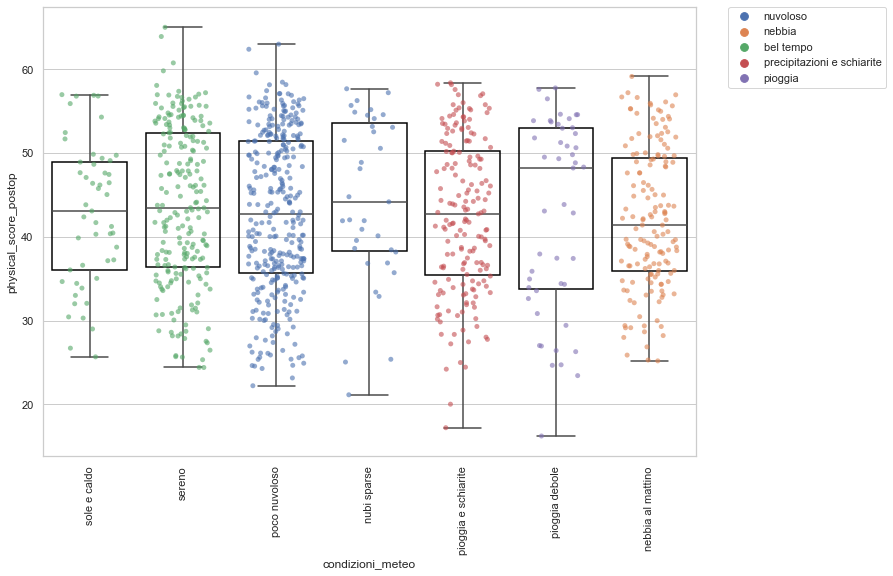

In [207]:
sns.set_style("whitegrid")
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
}
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo, \
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            **PROPS)
physical_diff = sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_postop', hue = 'weather_category', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], jitter = 0.3, alpha = 0.6)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#sns.boxplot(x='day', y='total_bill', data=tips, palette='turbo', width=0.3,
#            boxprops={'zorder': 2}, ax=ax)

In [208]:
df1_significativo.groupby('condizioni_meteo')[['physical_score_postop', 'mental_score_postop', 'physical_score_diff', 'temperatura_media', 'umidita_media']].agg(['count', 'median', 'std', 'mean'])

physical_score_postop                               \
                                    count median        std       mean   
condizioni_meteo                                                         
nebbia al mattino                     151  41.39   8.369864  42.179205   
nubi sparse                            35  44.17   9.965701  44.449143   
pioggia debole                         47  48.21  11.575474  42.542553   
pioggia e schiarite                   175  42.73   9.121661  42.546114   
poco nuvoloso                         334  42.73   9.371561  42.830808   
sereno                                217  43.45   9.389487  43.695991   
sole e caldo                           49  43.08   8.549994  42.714286   

                    mental_score_postop                                \
                                  count  median        std       mean   
condizioni_meteo                                                        
nebbia al mattino                   151  55.310  10.659998  51.523642   
nubi sparse                          35  57.810   6.002863  56.215143   
pioggia debole                       47  51.040  10.517752  50.095957   
pioggia e schiarite                 175  53.170  10.262634  50.754514   
poco nuvoloso                       334  54.915  10.305192  51.944491   
sereno                              217  54.830  10.388610  51.959032   
sole e caldo                         49  55.470  13.123733  50.254286   

                    physical_score_diff                               \
                                  count median        std       mean   
condizioni_meteo                                                       
nebbia al mattino                   151   9.70   9.912556   9.309934   
nubi sparse                          35   7.50  10.322365   9.837143   
pioggia debole                       47   9.10  12.058407   8.121277   
pioggia e schiarite                 175   9.10  10.305713   9.367429   
poco nuvoloso                       334  10.55  10.986842  10.312275   
sereno                              217   9.00  11.014348  10.192627   
sole e caldo                         49   9.80   9.135550  10.291837   

                    temperatura_media                              \
                                count median       std       mean   
condizioni_meteo                                                    
nebbia al mattino                 151    6.0  4.959118   6.741722   
nubi sparse                        35   11.0  5.473696  10.457143   
pioggia debole                     47    8.0  4.022255   7.680851   
pioggia e schiarite               175    9.0  4.615957  10.057143   
poco nuvoloso                     334   16.0  8.410632  16.000000   
sereno                            217   10.0  6.236202  11.285714   
sole e caldo                       49   28.0  1.985706  27.122449   

                    umidita_media                               
                            count median        std       mean  
condizioni_meteo                                                
nebbia al mattino             151   85.0  11.125946  82.000000  
nubi sparse                    35   79.0  15.184136  77.828571  
pioggia debole                 47   97.0   7.821139  93.297872  
pioggia e schiarite           175   88.0   9.576500  85.142857  
poco nuvoloso                 334   67.0  12.276168  66.446108  
sereno                        217   59.0  13.512337  59.152074  
sole e caldo                   49   58.0   5.668267  58.469388

In [209]:
sunto_p_post = df1_significativo.groupby('condizioni_meteo')['physical_score_postop'].agg(['count', 'median', 'std', 'mean'])
sunto_m_post = df1_significativo.groupby('condizioni_meteo')['mental_score_postop'].agg(['count', 'median', 'std', 'mean'])
sunto_p_diff = df1_significativo.groupby('condizioni_meteo')['physical_score_diff'].agg(['count', 'median', 'std', 'mean'])
sunto_temp_umid = df1_significativo.groupby('condizioni_meteo')[['temperatura_media', 'umidita_media']].agg(['count', 'median', 'std', 'mean'])

#intervallo confidenza
z = 1.96

sunto_p_post['mean_conf_inf'] = sunto_p_post['mean'] - z * sunto_p_post['std'] / sunto_p_post['count']**(1/2)
sunto_p_post['mean_conf_sup'] = sunto_p_post['mean'] + z * sunto_p_post['std'] / sunto_p_post['count']**(1/2)
sunto_p_post

,count,median,std,mean,mean_conf_inf,mean_conf_sup
condizioni_meteo,,,,,,
nebbia al mattino,151,41.39,8.369864,42.179205,40.844191,43.514220
nubi sparse,35,44.17,9.965701,44.449143,41.147501,47.750784
pioggia debole,47,48.21,11.575474,42.542553,39.233179,45.851928
pioggia e schiarite,175,42.73,9.121661,42.546114,41.194630,43.897599
poco nuvoloso,334,42.73,9.371561,42.830808,41.825742,43.835875
sereno,217,43.45,9.389487,43.695991,42.446687,44.945295
sole e caldo,49,43.08,8.549994,42.714286,40.320287,45.108284


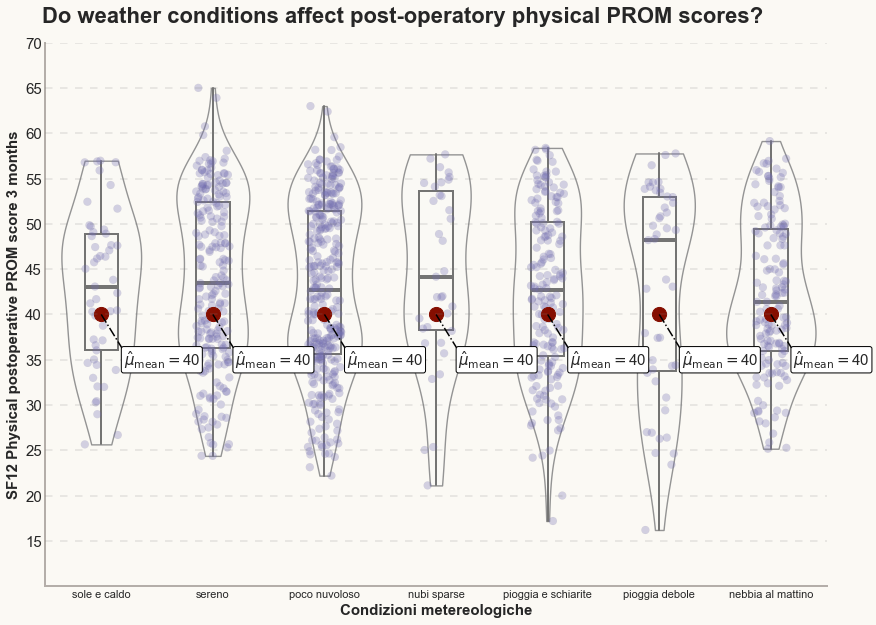

In [210]:
sns.set_style('white')
fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
#color_scale = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
color_scale = ["#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3"]
#linee_orizzontali = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
linee_orizzontali = list(range(15, 75, 5))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 2},
    'whiskerprops':{'color':'#747473', 'linewidth':2},
    'medianprops':{'linewidth':'4', 'color':'#747473', 'solid_capstyle':'butt'}
}

sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='physical_score_postop',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
                    linewidth=1.4, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    ax = ax)
#ax.set_facecolor('#fbf9f4')


    
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            width = 0.3, \
            showcaps = False,\
            ax = ax,\
            #showmeans = True, \
            **BOX_PROPS)
physical_diff = sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], 
                      #hue = 'weather_category',
                      palette = color_scale, \
                      jitter = 0.15, \
                      alpha = 0.3, \
                      linewidth = 0.1, \
                      s = 8,
                      ax = ax)

for h in linee_orizzontali:
    ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=5)

# Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_ylim(10,70)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=15)
ax.set_ylabel("SF12 Physical postoperative PROM score 3 months", size=15, weight="bold")
# ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
ax.set_xlabel("Condizioni metereologiche", size=15, weight="bold")

# Titolo
fig.suptitle(
    "Do weather conditions affect post-operatory physical PROM scores?",
    x = 0.122,
    y = 0.93,
    ha="left",
    fontsize=22,
    weight="bold",
    wrap = True
)
# Label media
means = [40,40,40,40,40,40,40]
for i, mean in enumerate(means):
    # Add dot representing the mean
    ax.scatter(i, mean, s=200, color='#850e00', zorder=3)
    
    # Add line conecting mean value and its label
    ax.plot([i, i + 0.25], [mean, mean - 5], ls="dashdot", color="black", zorder=10)
    
    # Add mean value label.
    ax.text(
        i + 0.20,
        mean - 5,
        r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
        fontsize=15,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.15
        ),
        zorder=10 # to make sure the line is on top
    )

#plt.xticks(rotation=0)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#sns.boxplot(x='day', y='total_bill', data=tips, palette='turbo', width=0.3,
#            boxprops={'zorder': 2}, ax=ax)


# Ultima versione

C:\Users\Giorgio\AppData\Local\Temp/ipykernel_23960/234996432.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)


Text(0.122, 0.96, "Le condizioni metereologiche influenzano l'indice SF-12 Physical Score\npostoperatorio a tre mesi da un'operazione chirurgica ?")

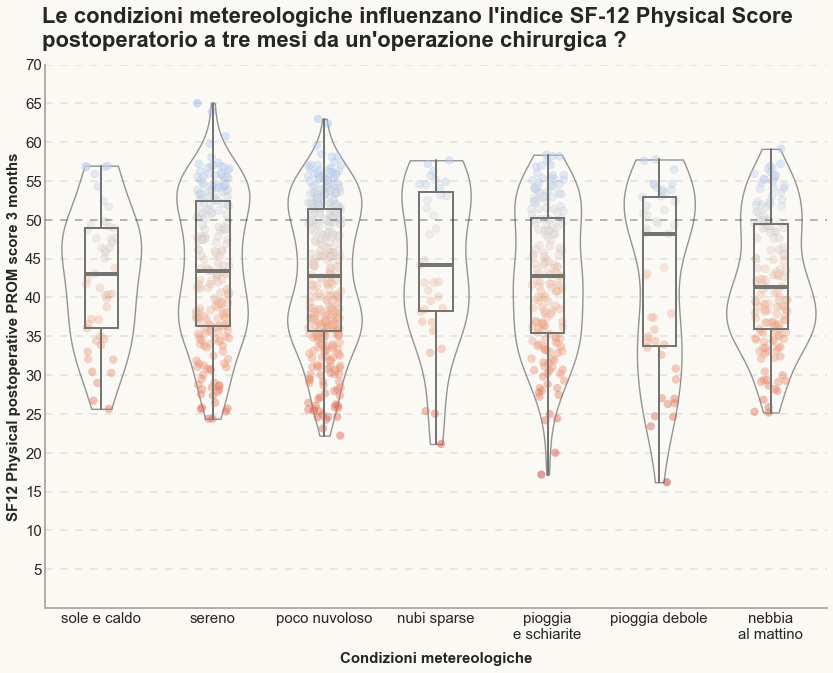

In [249]:
sns.set_style('white')
fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
#color_scale = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
color_scale = ["#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3"]
#linee_orizzontali = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
linee_orizzontali = list(range(5, 75, 5))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 2},
    'whiskerprops':{'color':'#747473', 'linewidth':2},
    'medianprops':{'linewidth':'4', 'color':'#747473', 'solid_capstyle':'butt'},
    'meanprops':{"marker":"o","markerfacecolor":"#850e00", "markeredgecolor":"#850e00", 'zorder':3}
}

sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='physical_score_postop',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
                    linewidth=1.4, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    zorder = 0,\
                    ax = ax)

# Color_Palette
bin = np.arange(15,85,1)
df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)

 
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            width = 0.3, \
            showcaps = False,\
            ax = ax,\
            #showmeans = True, \
            **BOX_PROPS)


sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], 
                      hue = 'bin',
                      # Paletta divergente reversed
                      palette = "coolwarm_r", \
                      jitter = 0.15, \
                      alpha = 0.45, \
                      linewidth = 0.1, \
                      s = 8,
                      zorder = 1,
                      ax = ax)

plt.legend([],[], frameon=False)

# Linee in background 
for h in linee_orizzontali:
    if h == 50:
        ax.axhline(50, color='k', ls=(0, (5, 5)), alpha=0.4, zorder=6)
    else:
        ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=5)
        

# Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_ylim(0,70)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=15)
y_label_ita = "SF-12 Physical Score postoperatorio a 3 mesi"
Y_label_eng = "SF12 Physical postoperative PROM score 3 months"
ax.set_ylabel("SF12 Physical postoperative PROM score 3 months", size=15, weight="bold")
ax.set_xlabel("Condizioni metereologiche", size=15, weight="bold", labelpad = 10)
#x_labels (labelpad: spacing dall'asse)
xlabels = ['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia\ne schiarite', 'pioggia debole','nebbia\nal mattino']
ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")



# Titolo
titolo_italiano = "Le condizioni metereologiche influenzano l'indice SF-12 Physical Score\npostoperatorio a tre mesi da un'operazione chirurgica ?"
titolo_inglese = "Do weather conditions affect post-operatory physical PROM scores?"
fig.suptitle(
    titolo_italiano,
    x = 0.122,
    y = 0.96,
    ha="left",
    fontsize=22,
    weight="bold",
    wrap = True
)



# SALVATAGGIO
#fig.tight_layout()


# Versione alt 0-100

C:\Users\Giorgio\AppData\Local\Temp/ipykernel_23960/476015807.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)


Text(0.122, 0.96, "Le condizioni metereologiche influenzano l'indice SF-12 Physical Score\npostoperatorio a tre mesi da un'operazione chirurgica ?")

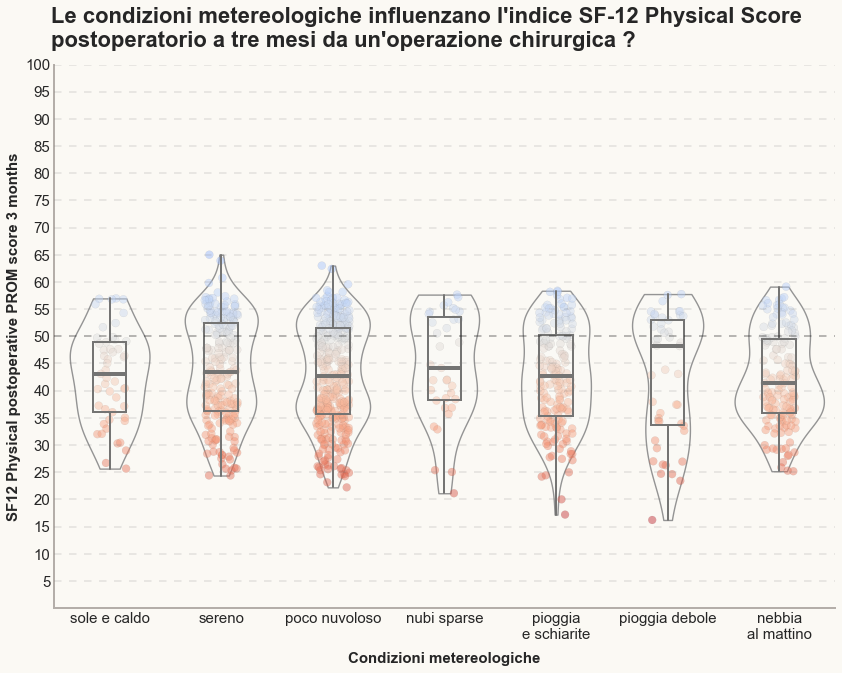

In [250]:
sns.set_style('white')
fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
#color_scale = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
color_scale = ["#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3", "#7570B3"]
#linee_orizzontali = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
linee_orizzontali = list(range(5, 105, 5))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 2},
    'whiskerprops':{'color':'#747473', 'linewidth':2},
    'medianprops':{'linewidth':'4', 'color':'#747473', 'solid_capstyle':'butt'},
    'meanprops':{"marker":"o","markerfacecolor":"#850e00", "markeredgecolor":"#850e00", 'zorder':3}
}

sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='physical_score_postop',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
                    linewidth=1.4, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    zorder = 0,\
                    ax = ax)

# Color_Palette
bin = np.arange(15,85,1)
df1_significativo['bin'] = pd.cut(abs(df1_significativo['physical_score_postop']),bin,precision=0)

 
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            width = 0.3, \
            showcaps = False,\
            ax = ax,\
            #showmeans = True, \
            **BOX_PROPS)


sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_postop', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], 
                      hue = 'bin',
                      # Paletta divergente reversed
                      palette = "coolwarm_r", \
                      jitter = 0.15, \
                      alpha = 0.45, \
                      linewidth = 0.1, \
                      s = 8,
                      zorder = 1,
                      ax = ax)

plt.legend([],[], frameon=False)

# Linee in background 
for h in linee_orizzontali:
    if h == 50:
        ax.axhline(50, color='k', ls=(0, (5, 5)), alpha=0.4, zorder=6)
    else:
        ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=5)
        

# Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_ylim(0,100)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=15)
y_label_ita = "SF-12 Physical Score postoperatorio a 3 mesi"
Y_label_eng = "SF12 Physical postoperative PROM score 3 months"
ax.set_ylabel("SF12 Physical postoperative PROM score 3 months", size=15, weight="bold")
ax.set_xlabel("Condizioni metereologiche", size=15, weight="bold", labelpad = 10)
#x_labels (labelpad: spacing dall'asse)
xlabels = ['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia\ne schiarite', 'pioggia debole','nebbia\nal mattino']
ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")



# Titolo
titolo_italiano = "Le condizioni metereologiche influenzano l'indice SF-12 Physical Score\npostoperatorio a tre mesi da un'operazione chirurgica ?"
titolo_inglese = "Do weather conditions affect post-operatory physical PROM scores?"
fig.suptitle(
    titolo_italiano,
    x = 0.122,
    y = 0.96,
    ha="left",
    fontsize=22,
    weight="bold",
    wrap = True
)



# SALVATAGGIO
#fig.tight_layout()


## mental vs category

Text(0.122, 0.93, 'Do weather conditions affect post-operatory mental PROM scores?')

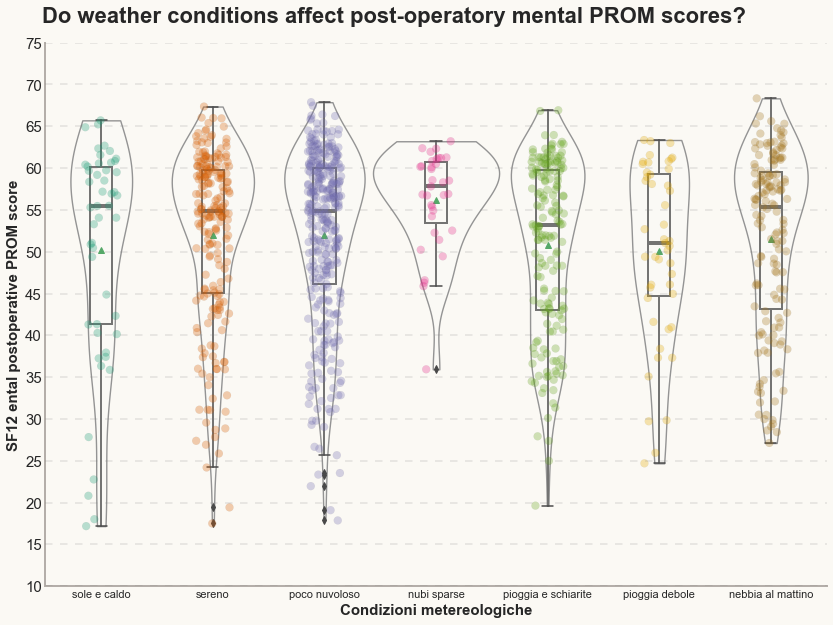

In [79]:
#sns.set_style('white')
fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
color_scale = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
linee_orizzontali = [10,15,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
#linee_orizzontali = list(range(5, 105, 5))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 2},
    'whiskerprops':{'color':'#747473', 'linewidth':2},
    'medianprops':{'linewidth':'4', 'color':'#747473', 'solid_capstyle':'butt'}
}

sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='mental_score_postop',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
                    linewidth=1.4, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    width = 1.13, \
                    ax = ax)
#ax.set_facecolor('#fbf9f4')


    
sns.boxplot(x = 'condizioni_meteo', y = 'mental_score_postop', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            width = 0.2, \
            showcaps = True,\
            ax = ax,\
            showmeans = True, \
            **BOX_PROPS)
mental_bdiff = sns.stripplot(x = 'condizioni_meteo', y = 'mental_score_postop', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], 
                      #hue = 'weather_category',
                      palette = color_scale, \
                      jitter = 0.15, \
                      alpha = 0.3, \
                      linewidth = 0.1, \
                      s = 8,
                      ax = ax)

for h in linee_orizzontali:
    ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=4)

# Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_ylim(10,75)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=15)
ax.set_ylabel("SF12 ental postoperative PROM score", size=15, weight="bold")
# ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
ax.set_xlabel("Condizioni metereologiche", size=15, weight="bold")

# Titolo
fig.suptitle(
    "Do weather conditions affect post-operatory mental PROM scores?",
    x = 0.122,
    y = 0.93,
    ha="left",
    fontsize=22,
    weight="bold",
    wrap = True
)

#plt.xticks(rotation=0)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#sns.boxplot(x='day', y='total_bill', data=tips, palette='turbo', width=0.3,
#            boxprops={'zorder': 2}, ax=ax)


## post_pre_phy_diff vs category

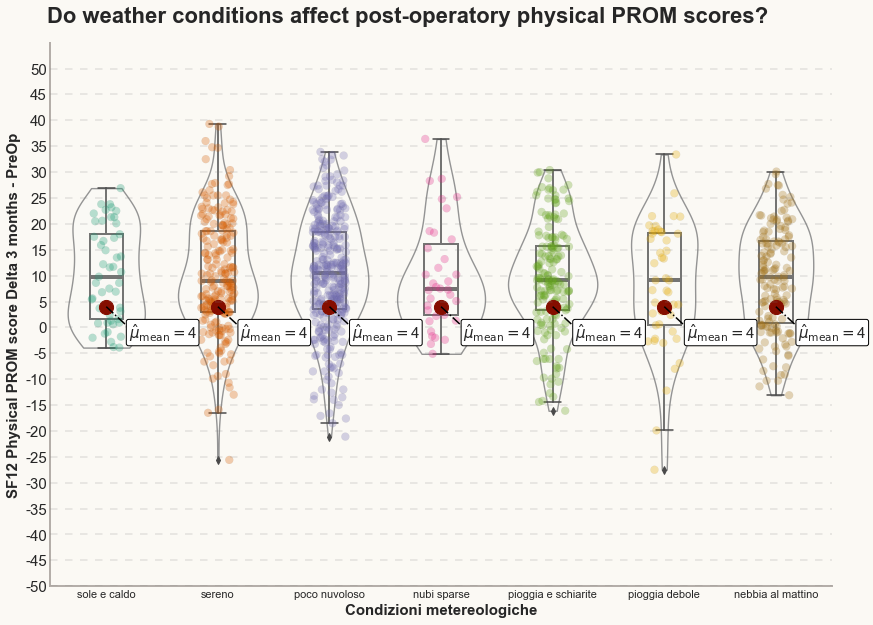

In [80]:
#sns.set_style('white')
fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor('#fbf9f4')
ax.set_facecolor('#fbf9f4')
color_scale = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"]
#linee_orizzontali = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
linee_orizzontali = list(range(-50, 55, 5))
    
BOX_PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'#747473', 'zorder': 2, 'linewidth': 2},
    'whiskerprops':{'color':'#747473', 'linewidth':2},
    'medianprops':{'linewidth':'4', 'color':'#747473', 'solid_capstyle':'butt'}
}

sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='physical_score_diff',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
                    linewidth=1.4, \
                    inner = None, \
                    color = '#fbf9f4', \
                    scale = 'area', \
                    cut = 0, \
                    alpha = 1, \
                    ax = ax)
#ax.set_facecolor('#fbf9f4')


    
sns.boxplot(x = 'condizioni_meteo', y = 'physical_score_diff', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            width = 0.3, \
            showcaps = True,\
            ax = ax,\
            #showmeans = True, \
            **BOX_PROPS)
physical_diff = sns.stripplot(x = 'condizioni_meteo', y = 'physical_score_diff', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], 
                      #hue = 'weather_category',
                      palette = color_scale, \
                      jitter = 0.15, \
                      alpha = 0.3, \
                      linewidth = 0.1, \
                      s = 8,
                      ax = ax)

for h in linee_orizzontali:
    ax.axhline(h, color='#7F7F7F', ls=(0, (5, 5)), alpha=0.2, zorder=4)

# Contorno grafico
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_color('#b4aea9')
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color('#b4aea9')
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_ylim(-50, 55)
ax.set_yticks(linee_orizzontali)
ax.set_yticklabels(linee_orizzontali, size=15)
ax.set_ylabel("SF12 Physical PROM score Delta 3 months - PreOp", size=15, weight="bold")
# ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
ax.set_xlabel("Condizioni metereologiche", size=15, weight="bold")

# Titolo
fig.suptitle(
    "Do weather conditions affect post-operatory physical PROM scores?",
    x = 0.122,
    y = 0.93,
    ha="left",
    fontsize=22,
    weight="bold",
    wrap = True
)

# Label media
means = [4,4,4,4,4,4,4]
for i, mean in enumerate(means):
    # Add dot representing the mean
    ax.scatter(i, mean, s=200, color='#850e00', zorder=3)
    
    # Add line conecting mean value and its label
    ax.plot([i, i + 0.25], [mean, mean - 5], ls="dashdot", color="black", zorder=10)
    
    # Add mean value label.
    ax.text(
        i + 0.20,
        mean - 5,
        r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
        fontsize=15,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.15
        ),
        zorder=10 # to make sure the line is on top
    )

#plt.xticks(rotation=0)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#sns.boxplot(x='day', y='total_bill', data=tips, palette='turbo', width=0.3,
#            boxprops={'zorder': 2}, ax=ax)

#plt.xticks(rotation=0)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#sns.boxplot(x='day', y='total_bill', data=tips, palette='turbo', width=0.3,
#            boxprops={'zorder': 2}, ax=ax)


### Valuto umidità e temperatura media/mediana

In [81]:
df1_significativo.groupby('condizioni_meteo')[['physical_score_postop', 'mental_score_postop', \
                                               'mental_physical_diff_postop', 'temperatura_media', \
                                               'umidita_media']].agg(['mean','median'])

physical_score_postop        mental_score_postop          \
                                     mean median                mean  median   
condizioni_meteo                                                               
nebbia al mattino               42.179205  41.39           51.523642  55.310   
nubi sparse                     44.449143  44.17           56.215143  57.810   
pioggia debole                  42.542553  48.21           50.095957  51.040   
pioggia e schiarite             42.546114  42.73           50.754514  53.170   
poco nuvoloso                   42.830808  42.73           51.944491  54.915   
sereno                          43.695991  43.45           51.959032  54.830   
sole e caldo                    42.714286  43.08           50.254286  55.470   

                    mental_physical_diff_postop        temperatura_media  \
                                           mean median              mean   
condizioni_meteo                                                           
nebbia al mattino                      9.344437  8.650          6.741722   
nubi sparse                           11.766000  9.060         10.457143   
pioggia debole                         7.553404  7.390          7.680851   
pioggia e schiarite                    8.208400  6.960         10.057143   
poco nuvoloso                          9.113683  8.265         16.000000   
sereno                                 8.263041  8.040         11.285714   
sole e caldo                           7.540000  7.640         27.122449   

                           umidita_media         
                    median          mean median  
condizioni_meteo                                 
nebbia al mattino      6.0     82.000000   85.0  
nubi sparse           11.0     77.828571   79.0  
pioggia debole         8.0     93.297872   97.0  
pioggia e schiarite    9.0     85.142857   88.0  
poco nuvoloso         16.0     66.446108   67.0  
sereno                10.0     59.152074   59.0  
sole e caldo          28.0     58.469388   58.0

### mental_physical_diff vs category

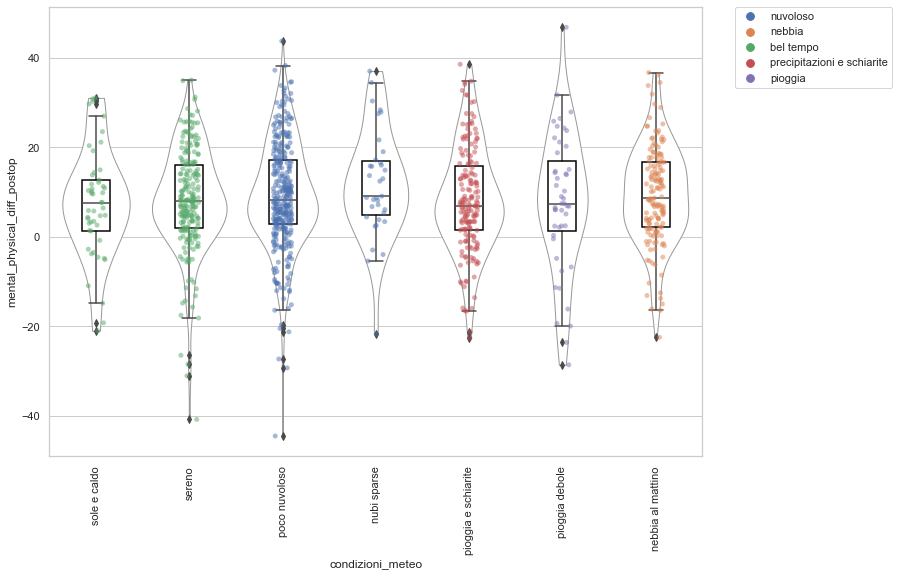

In [82]:
sns.set_style("whitegrid")
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black', 'zorder': 2},
}
ax = sns.violinplot(data=df1_significativo, x='condizioni_meteo', y='mental_physical_diff_postop',
                    order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
                    linewidth=1, \
                    linecolor = 'black', \
                    inner = None, \
                    color = 'white',
                    cut = 0)  
                    
sns.boxplot(x = 'condizioni_meteo', y = 'mental_physical_diff_postop', data = df1_significativo, \
            order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                 'nebbia al mattino'], \
            width = 0.3, \
            ax = ax,\
            **PROPS)
physical_diff = sns.stripplot(x = 'condizioni_meteo', y = 'mental_physical_diff_postop', data = df1_significativo,
                      order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'pioggia e schiarite', 'pioggia debole',
                      'nebbia al mattino'], 
                      hue = 'weather_category',
                      jitter = 0.1, alpha = 0.5, ax = ax)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#sns.boxplot(x='day', y='total_bill', data=tips, palette='turbo', width=0.3,
#            boxprops={'zorder': 2}, ax=ax)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'sole e caldo'),
  Text(1, 0, 'sereno'),
  Text(2, 0, 'poco nuvoloso'),
  Text(3, 0, 'nubi sparse'),
  Text(4, 0, 'coperto'),
  Text(5, 0, 'nebbia al mattino'),
  Text(6, 0, 'nebbia'),
  Text(7, 0, 'pioggia e schiarite'),
  Text(8, 0, 'temporale e schiarite'),
  Text(9, 0, 'pioggia mista a neve e schiarite'),
  Text(10, 0, 'neve e schiarite'),
  Text(11, 0, 'pioggia debole'),
  Text(12, 0, 'pioggia'),
  Text(13, 0, 'neve debole'),
  Text(14, 0, 'neve')])

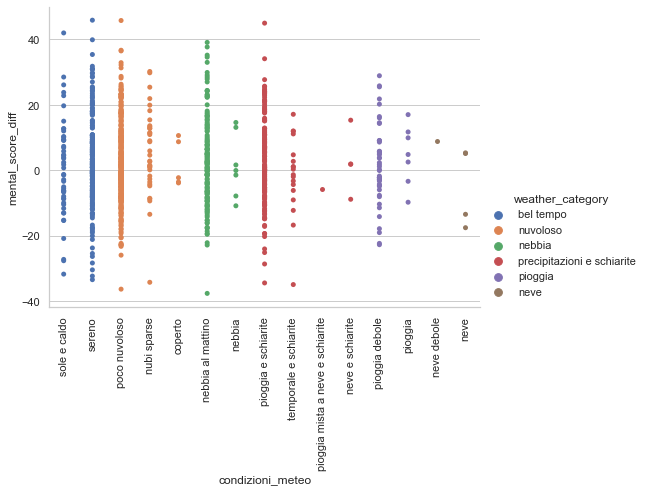

In [83]:
sns.catplot(x = 'condizioni_meteo', y = 'mental_score_diff', hue = 'weather_category', data = df1,
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = False, aspect = 11.7/8.27)
plt.xticks(rotation=90)

Provo a fare la stessa cosa ma sulla differenza physical_mental

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'sole e caldo'),
  Text(1, 0, 'sereno'),
  Text(2, 0, 'poco nuvoloso'),
  Text(3, 0, 'nubi sparse'),
  Text(4, 0, 'coperto'),
  Text(5, 0, 'nebbia al mattino'),
  Text(6, 0, 'nebbia'),
  Text(7, 0, 'pioggia e schiarite'),
  Text(8, 0, 'temporale e schiarite'),
  Text(9, 0, 'pioggia mista a neve e schiarite'),
  Text(10, 0, 'neve e schiarite'),
  Text(11, 0, 'pioggia debole'),
  Text(12, 0, 'pioggia'),
  Text(13, 0, 'neve debole'),
  Text(14, 0, 'neve')])

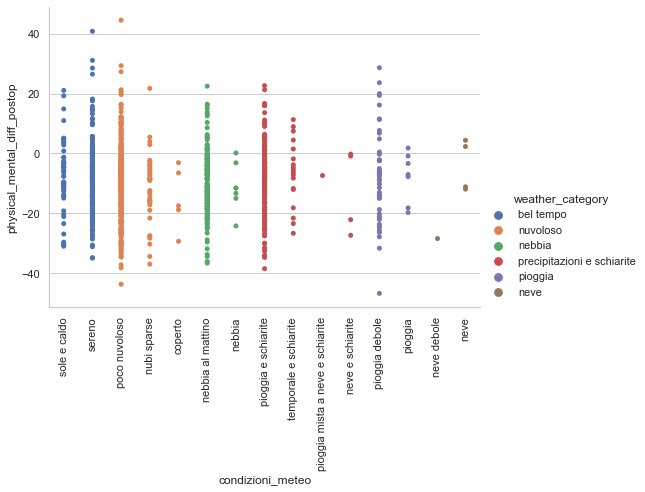

In [84]:
sns.catplot(x = 'condizioni_meteo', y = 'physical_mental_diff_postop', hue = 'weather_category', data = df1,
           order=['sole e caldo', 'sereno', 'poco nuvoloso', 'nubi sparse', 'coperto', 'nebbia al mattino', 'nebbia',
                      'pioggia e schiarite','temporale e schiarite', 'pioggia mista a neve e schiarite', 'neve e schiarite', 
                      'pioggia debole', 'pioggia', 'neve debole', 'neve'], hue_order = ['bel tempo', 'nuvoloso', 'nebbia',
                      'precipitazioni e schiarite', 'pioggia', 'neve'], jitter = False, aspect = 11.7/8.27)
plt.xticks(rotation=90)

## Cleveland Dotplot

In [85]:
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,physical_mental_diff_postop,physical_mental_diff_preop,mental_physical_diff_postop,mental_physical_diff_preop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,above_physical,above_mental,weather_category
0,27.60,37.40,9.8,54.36,58.46,4.1,-21.06,-26.76,21.06,26.76,poco nuvoloso,F,70,20.0,69.0,False,True,0,1,nuvoloso
1,28.15,38.25,10.1,57.02,64.62,7.6,-26.37,-28.87,26.37,28.87,poco nuvoloso,M,69,18.0,65.0,False,True,0,1,nuvoloso
2,31.57,55.67,24.1,60.27,58.47,-1.8,-2.80,-28.70,2.80,28.70,poco nuvoloso,M,70,23.0,74.0,False,True,1,1,nuvoloso
3,34.28,57.08,22.8,50.17,54.97,4.8,2.11,-15.89,-2.11,15.89,poco nuvoloso,F,66,15.0,72.0,False,True,1,1,nuvoloso
4,27.43,29.13,1.7,54.14,55.74,1.6,-26.61,-26.71,26.61,26.71,nebbia al mattino,F,73,18.0,75.0,False,True,0,1,nebbia


## Scatter Plot 

In [86]:
df1['physical_score_postop'].min()
df1['physical_score_postop'].max()

65.01

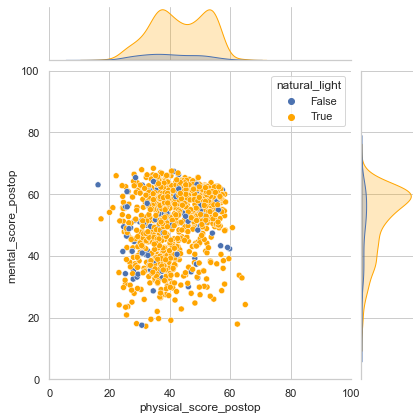

In [87]:
mental_physical_fig = sns.jointplot(data=df1, x="physical_score_postop", y="mental_score_postop", hue="natural_light", \
                                    xlim = (0,100), ylim = (0,100), palette = {False:'b', True:'orange'})


### Basic 2D Density Plot

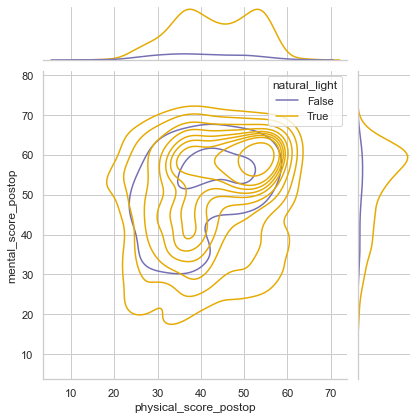

In [88]:
sns.set_style('whitegrid')
mental_physical_fig = sns.jointplot(data=df1, x="physical_score_postop", y="mental_score_postop", hue="natural_light", \
                                    kind = 'kde', space = 0.2, ax = ax, palette = {False:'#7570B3', True:'#E6AB02'})

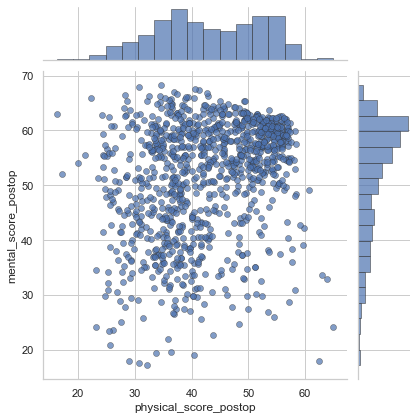

In [89]:
#fig, ax = plt.subplots(figsize= (14, 10))
g = sns.JointGrid(data=df1, x="physical_score_postop", y="mental_score_postop")
g.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)

### Add the color, add shade and bandwidth

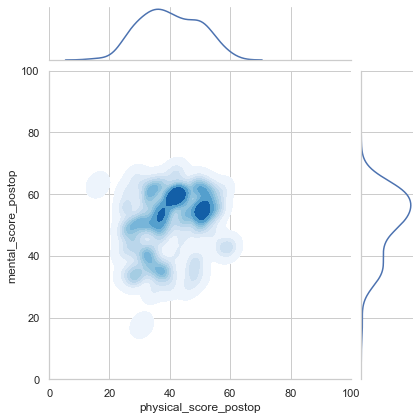

In [90]:
#https://www.python-graph-gallery.com/80-contour-plot-with-seaborn
sns.set_style("whitegrid")
#g = sns.FacetGrid(df1, col="natural_light")
#g.map(sns.jointplot, "physical_score_postop", "mental_score_postop", \
#      xlim = (0,100), ylim = (0,100), \
#      kind = 'kde', \
#      cmap="Blues", \
#      shade=True, \
#      thresh=0.01, \
#      bw_adjust=.5)
sns.jointplot(data = df1[df1['natural_light'] == False], x="physical_score_postop", y="mental_score_postop", \
                        xlim = (0,100), ylim = (0,100), \
                        kind = 'kde', \
                        cmap="Blues", \
                        shade=True, \
                        thresh=0.01, \
                        bw_adjust=.5)

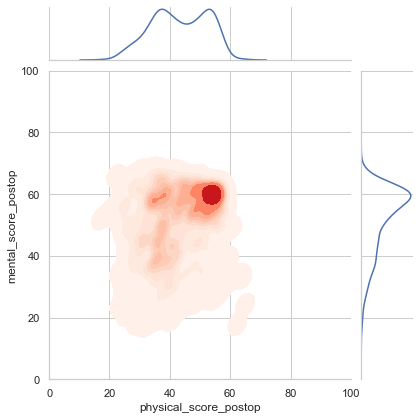

In [91]:
sns.jointplot(data = df1[df1['natural_light'] == True], x="physical_score_postop", y="mental_score_postop", \
                        xlim = (0,100), ylim = (0,100), \
                        kind = 'kde', \
                        cmap="Reds", \
                        shade=True, \
                        thresh=0.001, \
                        bw_adjust=.5)